## Predicting attendance at appointments

The purpose of this assignment is to get you up to speed with data manipulation and model training using Python. You should be able to begin working with data for your term project after finishing this.

To open this notebook in Colab, click this button:
<a href="https://colab.research.google.com/github/powenfang/Data-Science-for-Business-2021Fall-Elkan/blob/master/Homeworks/HW2.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>.
Then save the notebook to your personal Google Drive, and run the following cell.

In [1]:
!git clone https://github.com/powenfang/Data-Science-for-Business-2021Fall-Elkan
%cd Data-Science-for-Business-2021Fall-Elkan/Homeworks/

fatal: destination path 'Data-Science-for-Business-2021Fall-Elkan' already exists and is not an empty directory.
/content/Data-Science-for-Business-2021Fall-Elkan/Homeworks


### Scenario

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, SHMC must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to predict which patients are going to attend, so that you can plan better how many doctors to call.

In [2]:
import pandas as pd

data_path = "./data/data-hw2.csv" 

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset.**

In [3]:
# Put your answer here
data = pd.read_csv(data_path)
print("total number of rows:", len(data))
print(data.head())

total number of rows: 110527
      PatientId  AppointmentID Gender  ... Handicap SMS_received  No-show
0  2.987250e+13        5642903      F  ...        0            0       No
1  5.589980e+14        5642503      M  ...        0            0       No
2  4.262960e+12        5642549      F  ...        0            0       No
3  8.679510e+11        5642828      F  ...        0            0       No
4  8.841190e+12        5642494      F  ...        0            0       No

[5 rows x 14 columns]


Here's a brief summary of the features that you should see:

1. PatientId - Identifier of a patient.
2. AppointmentID - Identifier of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age - How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient.
15. No-show - Whether the patient missed the appointment.

**2. Check whether there are any Na (missing) or NaN values. Drop all the observations that include such values in any of the columns.**

In [4]:
# Put your answer here
data.isnull().values.any()

False

### Dealing with dates

**3. Transform the data type of columns ScheduledDay and AppointmentDay into datetimes, using pandas.**

In [5]:
# Put your answer here
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

**4. ScheduledDay includes a specific time with the date, but AppointmentDay does not. In order to compare both fields more easily, fix ScheduledDay to keep only the dates. Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [6]:
# Put your answer here
data['ScheduledDay'] = data['ScheduledDay'].dt.normalize()

**5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [7]:
# Put your answer here
data['TimeInAdvance'] = (data['ScheduledDay'] - data['AppointmentDay']).dt.days

**Extra credit: There are many other features you may want to extract from date variables, such as the time at which the appointment was scheduled, the day of the week, the month, etc.**

In [8]:
# Put your optional extra credit answer here

### Cleaning erroneous data

**6. Use the "describe" method from pandas to obtain general stats about the data. Are there anomalous values in any of the columns? 
Remove all observations that include values that are clearly wrong. Print the number of observations removed.
Add a text box to the notebook explaining what you removed, and why.**

In [9]:
# Use the "describe" method here
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,-10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000


In [10]:
# Remove observations with wrong values
original_length_of_data = len(data)
data = data[data['Age'] >= 0]
data = data[(data['Handicap'] == 1) | (data['Handicap'] == 0)]

print('I removed {} observations.'.format(original_length_of_data - len(data)))

I removed 200 observations.


### Dealing with binary variables

**7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Then drop the Gender column in-place.**

In [11]:
# Put your answer here
data['isFemale'] = data['Gender'].apply(lambda x: 1 if x == 'F' else 0)
data.drop(columns=['Gender'], inplace=True)

**8. Create a new column called "No-show" that equals 1 if the person didn't show and 0 otherwise.**

In [12]:
# Put your answer here
data['No-show'] = data['No-show'].apply(lambda x: 0 if x == 'No' else 1)

### Dealing with categorical variables

**9. Look at the Neighborhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?** 

In [13]:
# Put your answer here
nbhd_grouped_count = data.groupby(['Neighborhood'])['Neighborhood'].count()
print("There are {} unique neighborhoods.".format(len(nbhd_grouped_count)))
print()
print("5 most common neighborhood are:")
print(nbhd_grouped_count.nlargest(5))
print()
print("5 least common neighborhood are:")
print(nbhd_grouped_count.nsmallest(5))

There are 81 unique neighborhoods.

5 most common neighborhood are:
Neighborhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4420
JARDIM DA PENHA    3872
ITARARÉ            3507
Name: Neighborhood, dtype: int64

5 least common neighborhood are:
Neighborhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
Name: Neighborhood, dtype: int64


**10. We often group together category values that are rare because it is hard to generalize from them. For the neighborhoods that occur fewer than 500 times,  replace their value with "OTHER".**

In [14]:
# Put your answer here
nbhds_less_than_500 = list(nbhd_grouped_count[nbhd_grouped_count.values < 500].index)
data['Neighborhood'] = data['Neighborhood'].apply(lambda x: "OTHER" if x in nbhds_less_than_500 else x)

**11. Add indicator variables for each remaining neighborhood to the dataframe. Hint: Look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Then drop the Neighborhood column permanently.**

In [15]:
# Put your answer here
data = pd.get_dummies(data, columns=['Neighborhood'])

### Dealing with longitudinal data

**12. Look at the PatientsId column. How many patients have made more than one appointment?**

In [16]:
# Put your answer here
n_of_more_than_one_appointment = len(data.groupby(['PatientId'])['PatientId'].count().loc[lambda x: x > 1])
print('{} patients have made more than one appointment.'.format(n_of_more_than_one_appointment))

24449 patients have made more than one appointment.


Many patients have made multiple appointments. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. However, taking advantage of panel data often requires additional data processing.

**13. Create a new column called "PreviousNoShows" that for each appointment includes the number of previous appointments to which the patient did not show.**

For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one, if it exists. Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All this can be done in just a few lines of code using pandas.

In [17]:
# Put your answer here
data = data.sort_values(['PatientId', 'ScheduledDay'])
data['PreviousNoShows'] = data.groupby(['PatientId'])['No-show'].apply(lambda x: x.shift().cumsum().fillna(0).astype(int))

There are many other longitudinal features that we could compute, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the rest of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns from which we will not generalize. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay permanently.**

In [18]:
# Put your answer here
data.drop(columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace = True)

### Training a predictive model

**15. Let's train a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds.**

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Put your answer here
features = list(data.columns)
features.remove('No-show')

clfer = DecisionTreeClassifier()
scores = cross_validate(estimator = clfer, X = data[features], y = data['No-show'], cv = 5, scoring = 'accuracy', return_train_score = True)

print('avg_training_accuracy:', scores['train_score'].mean())
print('avg_cross-validated_accuracy:', scores['test_score'].mean())

avg_training_accuracy: 0.9725203276799856
avg_cross-validated_accuracy: 0.7297397686018228


One way to control the complexity of a decision tree is by requiring at least some minimum number of examples from the training set in each leaf. This is specified with the min_samples_leaf parameter. 

**16. Try values for min_samples_leaf ranging from 1 to 3000 by multiplicative increase, i.e., 1, 3, 10, 30, ..., 3000. For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot learning curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this label and dataset?** 

In [20]:
# Put your answer here
import matplotlib.pyplot as plt

min_samples_leaf = [(2*(i%2) + 1) * (10 ** (i//2)) for i in range(8)]
avg_training_accuracy = []
avg_crossval_accuracy = []
for l in min_samples_leaf:
    clfer = DecisionTreeClassifier(min_samples_leaf = l)
    scores = cross_validate(estimator = clfer, X = data[features], y = data['No-show'], cv = 5, scoring = 'accuracy', return_train_score = True)

    avg_training_accuracy.append(scores['train_score'].mean())
    avg_crossval_accuracy.append(scores['test_score'].mean())


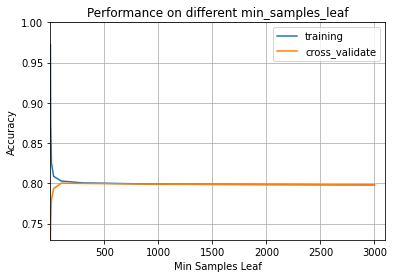

In [21]:
plt.plot(min_samples_leaf, avg_training_accuracy, label = 'training')
plt.plot(min_samples_leaf, avg_crossval_accuracy, label = 'cross_validate')
plt.title("Performance on different min_samples_leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.ylim([min(avg_crossval_accuracy), 1.0])
plt.xlim([1, 3100])
plt.legend()
plt.grid()
plt.show()

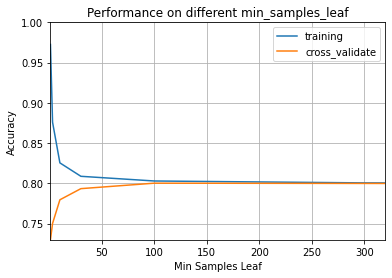

In [22]:
plt.plot(min_samples_leaf, avg_training_accuracy, label = 'training')
plt.plot(min_samples_leaf, avg_crossval_accuracy, label = 'cross_validate')
plt.title("Performance on different min_samples_leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.ylim([min(avg_crossval_accuracy), 1.0])
plt.xlim([1, 320])
plt.legend()
plt.grid()
plt.show()

I would choose 300 as the min_samples_leaf for this dataset.

**17. Business question: Do you think the accuracy of the model you built is good enough to be useful? Why? What information would be helpful to evaluate whether the model is useful? How would you use that information to evaluate usefulness?**

In [23]:
# Put your answer here in a text box

We can not evaluate the performance of this model by only looking into the accuracy. We should use other metrics like precision, recall to compare. If the Precision is high, which means our positive predictions are accurate, we are doing well on predicting people who won't show up. If the Recall is low, which means there are many patients will not show up but our model says they will, which is bad to our business.